In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [2]:
train_df = pd.read_csv(os.path.join("../input",'train.csv'), dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

In [3]:
train_df.shape

(629145480, 2)

# Training set 

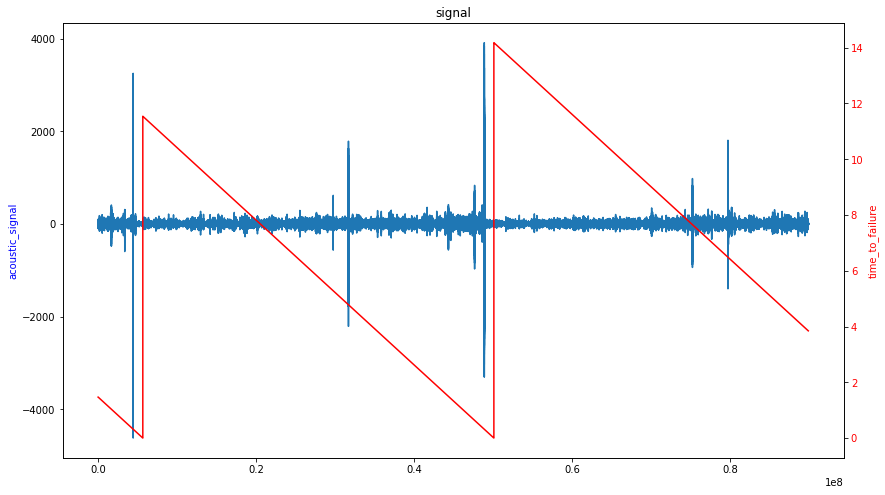

In [3]:
part_data = train_df.iloc[:int(629145480/7)]
def plot_signal_and_time(data_set,title="signal"):
    fig,ax1 = plt.subplots(figsize=(14,8))
    ax1.set_ylabel('acoustic_signal', color="blue")
    ax1.plot(data_set["acoustic_data"])

    ax2 = ax1.twinx()
    ttf_color = "red"
    ax2.set_ylabel('time_to_failure', color=ttf_color)
    ax2.plot(data_set["time_to_failure"],color=ttf_color)
    ax2.tick_params(axis='y', labelcolor=ttf_color)
    plt.title(title)
plot_signal_and_time(part_data)

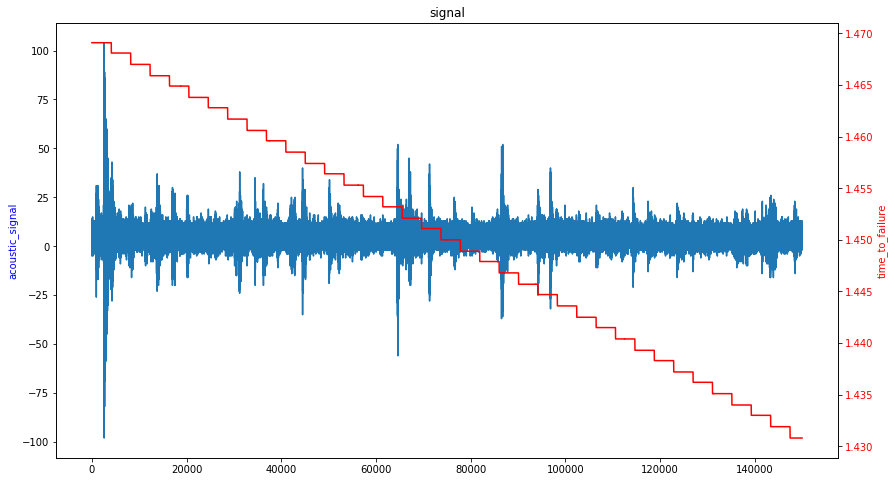

In [13]:
segment = train_df.iloc[:150000]
plot_signal_and_time(segment)

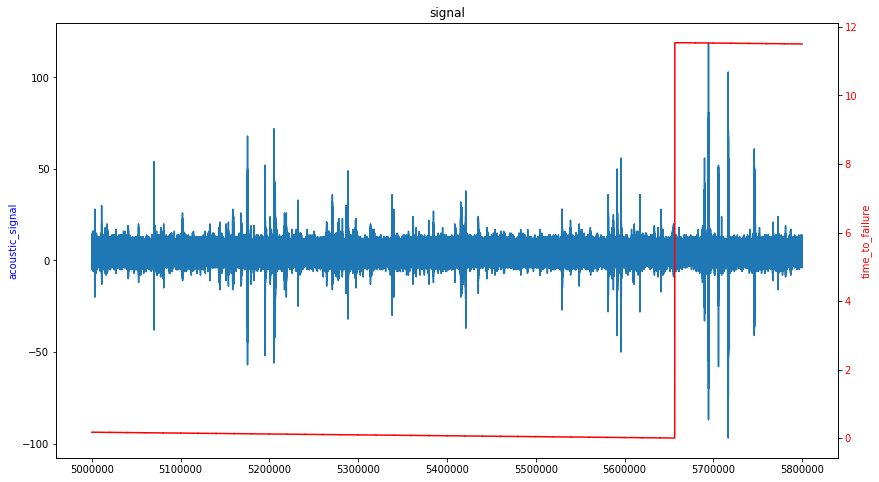

In [15]:
segment = train_df.iloc[5000000:5800000]
plot_signal_and_time(segment)

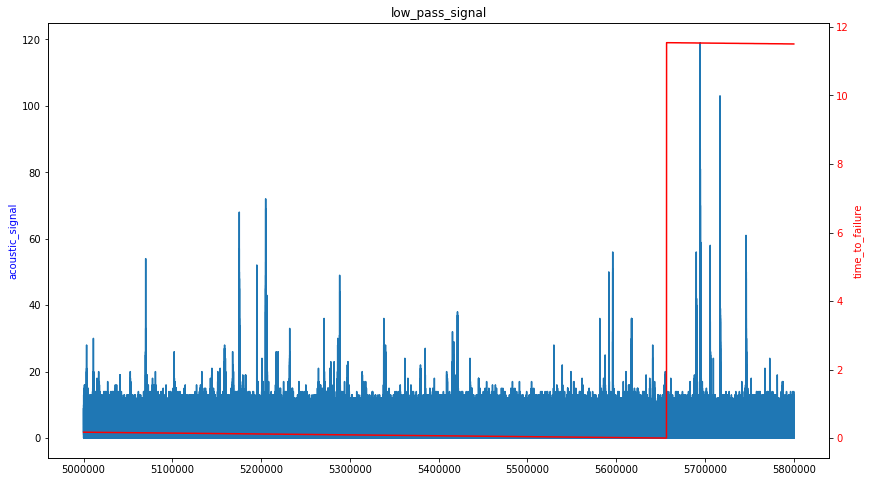

In [40]:
abs_segment = pd.DataFrame()

abs_segment["acoustic_data"] = segment["acoustic_data"].abs()
abs_segment["time_to_failure"] = segment["time_to_failure"]
plot_signal_and_time(abs_segment,"low_pass_signal")

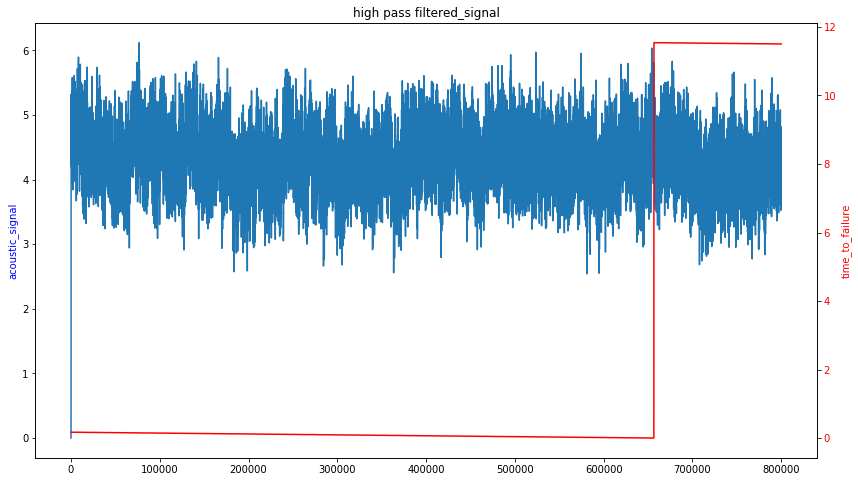

In [41]:
from scipy import signal
sos = signal.butter(10, 0.02, 'low',output='sos')
filtered_segment = pd.DataFrame()
filtered_segment["acoustic_data"] = signal.sosfilt(sos,segment["acoustic_data"])
filtered_segment["time_to_failure"] = segment.reset_index()["time_to_failure"]
plot_signal_and_time(filtered_segment,"high pass filtered_signal")

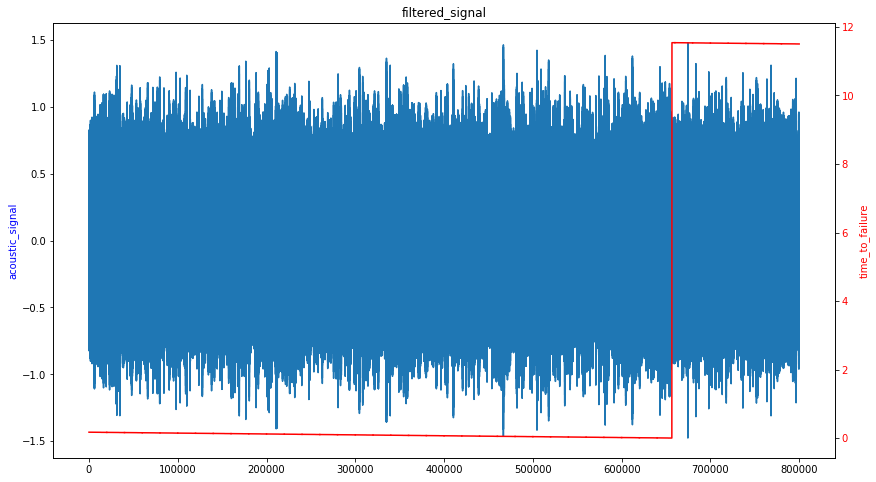

In [10]:
from scipy import signal
plt.rcParams['agg.path.chunksize'] = 20000
sos = signal.butter(10, 0.95, btype='high',output='sos')
filtered_segment = pd.DataFrame()
filtered_segment["acoustic_data"] = signal.sosfilt(sos,segment["acoustic_data"])
filtered_segment["time_to_failure"] = segment.reset_index()["time_to_failure"]
plot_signal_and_time(filtered_segment,"filtered_signal")

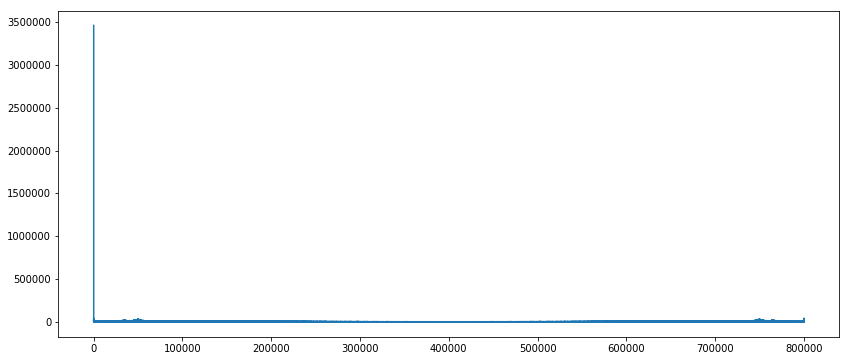

In [16]:
from scipy.fftpack import fft
ax,fig = plt.subplots(figsize=(14,6))
fft_signal = fft(segment["acoustic_data"])

plt.plot(np.abs(fft_signal))

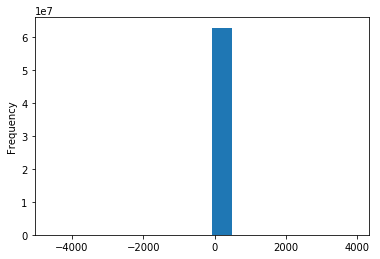

In [4]:
tenth_data = train_df.iloc[:int(629145480/10)]
tenth_data["acoustic_data"].plot.hist(bins=15)